# Short Test 2 (Sem B)
## **Question 1**
Consider an Ornstein-Uhlenbeck process V(t)

with $k = 3$ and $V (0) = -0.5$.

Determine using your own numerical algorithm the average time it takes to reach $1.35$ for the first time (2 significant figures). I.e., at what time does it reach a value that is equal to or larger than $1.35$.

### **Part A**: Determine the time it takes for a single walker (single process), $\tau_i$.
From lectures, we have that the numerical scheme for the Ornstein-Uhlenbeck process is
$$\begin{align*}
&V(t+\Delta t)-V(t)=\sqrt{\Delta t}Z(t)-kV(t)\Delta t\\
\Rightarrow &V(t+\Delta t)=(1-k\Delta t)V(t)+\sqrt{\Delta t}Z(t)
\end{align*}$$

In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt

'''PARAMS'''
time, tstep = 6, 1
mu, sigma = 0, 1
k=3

Generate random numbers of the variable $Z(t)$, plot the result to ensure distribution approximates a Gaussian.

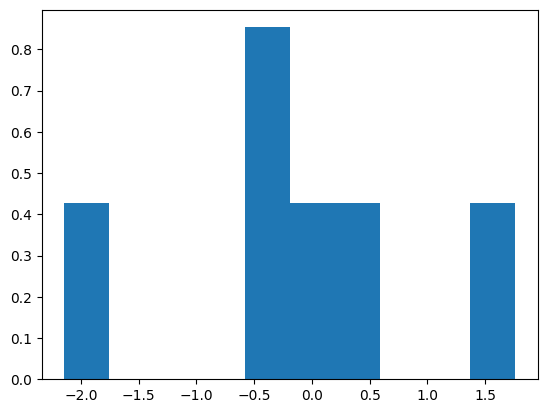

In [2]:
Z = np.random.normal(mu, sigma, round(time/tstep))
plt.hist(Z, 10, density=True);

Creating an array $V(t): t\in [0,40]$

In [3]:
V = np.zeros((round(time/tstep),))
V[0] = -0.5

We now fill in our values for the function, now shown in index form
$$
V_{i+1}=(1-k\Delta t)V_i+\sqrt{\Delta t}Z_i
$$

In [4]:
'''ORNSTEIN-UHLENBECK PROCESS'''
def ornsteinUhlenbeck(V, Z, time, tstep, k):
    sqrtTStep = np.sqrt(tstep)
    for i in range(1,round(time/tstep)):
        V[i] = 1-(k*tstep)
        V[i] *= V[i-1]
        V[i] += sqrtTStep*Z[i-1]
    return V
V = ornsteinUhlenbeck(V, Z, time, tstep, k)

Creating a plot of V(t) against time.

Time taken:	 1s (1.3673023343782116)


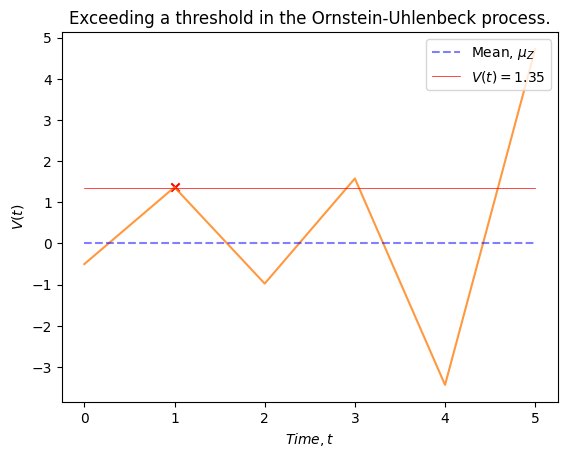

In [5]:
'''PLOTTING'''
fig, ax = plt.subplots()
T = np.arange(0, time, tstep)
ax.plot(T, V, color="C1", alpha=0.8, linestyle='-')
ax.plot(T, T*0, color="b", alpha=0.5, linestyle='--', label=r'Mean, $\mu_Z$')
ax.plot(T, np.full((round(time/tstep),), 1.35), color="r", alpha=1, linestyle='-', linewidth=0.5, label=r'$V(t)=1.35$')


'''Identify any values that meet V(t)>=1.35.'''
def getThreshold(list,increment, axis):
    loc = 0
    i = 0
    X = list.shape[0]
    while(i < X):
        if(list[i] >= 1.35):
            axis.scatter(i*increment, list[i], color="r", marker='x', label='')
            loc = i
            i = X
        i += 1
    return loc
overThreshold = getThreshold(V, tstep, ax)
if(overThreshold):
    print('Time taken:\t',str(overThreshold*tstep)+'s ('+str(V[overThreshold])+')')
else:
    print('None')
ax.set_title('Exceeding a threshold in the Ornstein-Uhlenbeck process.')
ax.set_xlabel(r'$Time, t$')
ax.set_ylabel(r'$V(t)$')
ax.legend(loc="upper right");
#plt.ylim(-3,3);

## *Question 2*
Now take the average over many walkers (multiple processes), $\tau=\langle\tau_i\rangle$. The amount of walkers and timestep should be chosen, such that the answer is accurate to at least two significant figures.


1000000.0

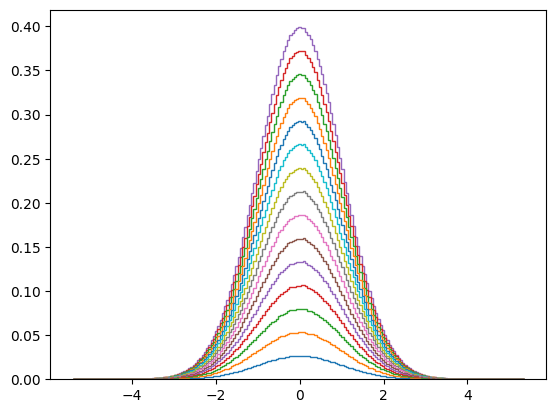

In [6]:
'''PARAMS'''
walkers = 15     # number of walkers
tstep = 0.001     # time step
time = 1000    # length of time (number of random variables)
overThreshold = []; np.array(overThreshold, dtype=int, ndmin=2)
V = np.zeros((walkers, round(time/tstep))) # stores all walks
V[:,0] = -0.5 # set initial values to -0.5
Z = [np.random.normal(mu, sigma, round(time/tstep)) for _ in range(walkers)] # create stacked array of random normal distributions
plt.hist(Z, 200, density=True, stacked=True, histtype='step');
time/tstep

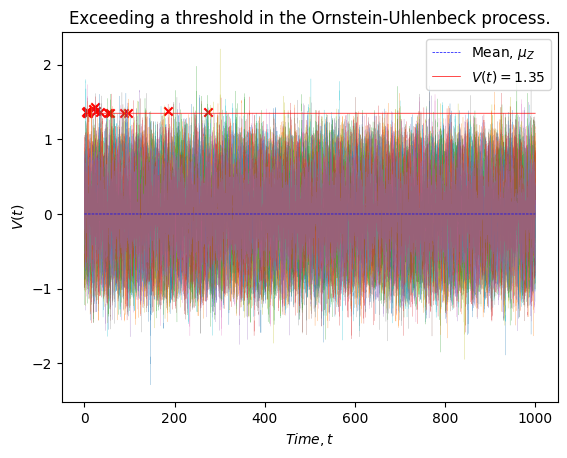

In [7]:
for i in range(walkers):
    V[i] = ornsteinUhlenbeck(V[i], Z[i], time, tstep, k) # add a new walk array to each row

'''PLOTTING'''
fig, ax = plt.subplots(1, 1, sharex='all')

T = np.arange(0, time, tstep) # creating time axis
for i in range(walkers):
    overThreshold = np.append(overThreshold, getThreshold(V[i], tstep, ax))

ax.plot(T, V.T, alpha=0.5, linestyle='-', linewidth=0.2)
ax.plot(T, T*0, color="b", alpha=1, linestyle='--', linewidth=0.5, label=r'Mean, $\mu_Z$')
ax.plot(T, np.full((round(time/tstep),), 1.35), color="r", alpha=1, linestyle='-', linewidth=0.5, label=r'$V(t)=1.35$')

ax.set_title('Exceeding a threshold in the Ornstein-Uhlenbeck process.')
ax.set_xlabel(r'$Time, t$')
ax.set_ylabel(r'$V(t)$')
ax.legend(loc="upper right");
#plt.ylim(-3,3);

In [8]:
np.mean(np.multiply(overThreshold, tstep)), np.std(np.multiply(overThreshold, tstep))

(59.28506666666666, 74.50916549567725)